In [175]:
# Function to plot Ellipses of clusters 
# https://stackoverflow.com/questions/12301071/multidimensional-confidence-intervals
from matplotlib.patches import Ellipse

def plot_point_cov(points, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma ellipse based on the mean and covariance of a point
    "cloud" (points, an Nx2 array).

    Parameters
    ----------
        points : An Nx2 array of the data points.
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

In [176]:
# Create a list of champions - to be used for subreddits URLs
# There are some special cases, which will be explained next cell...

mains = ["Aatrox","Ahri","Akali","Amumu","Anivia","Annie","Ashe","Aurelion_Sol_",
         "Azir","Bard",

"Blitzcrank",

"Brand",

"Braum",

"Caitlyn",

"Camille",

"Cassiopeia",

"ChoGath",

"Corki",

"Darius",

"Diana",

"DrMundo",

"Ekko",

"Elise",

"Evelynn",

"Ezreal",

"Fiddlesticks",

"Fiora",

"Fizz",

"Galio",

"Gangplank",

"Garen",

"Gnar",

"Gragas",

"Graves",

"Hecarim",

"Heimerdinger",

"Irelia",

"Ivern",

"JarvanIV",

"Jax",

"Jayce",

"Jhin",

"Kalista",

"Karma",

"Karthus",

"Kassadin",

"Katarina",

"Kayle",

"Kayn",

"Kennen",

"KhaZix",


"Kled",

"KogMaw",

"LeBlanc",

"LeeSin",

"Leona",

"Lissandra",

"Lucian",

"Lulu",

"Malphite",

"Malzahar",

"Maokai",

"MasterYi",

"MissFortune",

"Mordekaiser",

"Morgana",

"Nami",

"Nasus",

"Nautilus",

"Nidalee",

"Nocturne",

"Nunu",

"Olaf",

"Orianna",

"Ornn",

"Pantheon",

"Poppy",

"Quinn",

"Rakan",

"Rammus",

"RekSai",

"Renekton",

"Rengar",

"Riven",

"Rumble",

"Ryze",

"Sejuani",

"Shaco",

"Shyvana",

"Singed",

"Skarner",

"Sona",

"Soraka",

"Swain",

"Syndra",

"TahmKench",

"Taliyah",

"Talon",

"Taric",

"Thresh",

"Tristana",

"Trundle",

"Tryndamere",

"TwistedFate",

"Twitch",

"Udyr",

"Urgot",

"Varus",

"Vayne",

"Veigar",

"Vi",

"Viktor",

"Vladimir",

"Volibear",

"Warwick",

"Wukong",

"Xayah",

"Xerath",

"XinZhao",

"Yasuo",

"Yorick",

"Zed",

"Ziggs",

"Zilean",

"Zoe",

"Zyra"]

In [177]:
mains_with_reddit = []
for i in range(len(mains)):
    mains_with_reddit.append(str(mains[i])+'mains')

In [178]:
main_sub_names = mains_with_reddit

main_sub_names.append('thesecretweapon')
main_sub_names.append('velkoz')
main_sub_names.append('TeemoTalk')
main_sub_names.append('Sivir')
main_sub_names.append('DirtySionMains')
main_sub_names.append('Shen')
main_sub_names.append('Lux')
main_sub_names.append('Kindred')
main_sub_names.append('leagueofjinx')
main_sub_names.append('Janna')
main_sub_names.append('Illaoi')
main_sub_names.append('Draven')
main_sub_names.append('Alistar')

In [179]:
read_name = []

for i in range(len(main_sub_names)):
    read_name.append(str(main_sub_names[i]) + '_df.csv')

In [180]:
clean_champ_names = mains

clean_champ_names.append('Zac')
clean_champ_names.append('Velkoz')
clean_champ_names.append('Teemo')
clean_champ_names.append('Sivir')
clean_champ_names.append('Sion')
clean_champ_names.append('Shen')
clean_champ_names.append('Lux')
clean_champ_names.append('Kindred')
clean_champ_names.append('Jinx')
clean_champ_names.append('Janna')
clean_champ_names.append('Illaoi')
clean_champ_names.append('Draven')
clean_champ_names.append('Alistar')

In [181]:
list(zip(read_name, clean_champ_names))

[('Aatroxmains_df.csv', 'Aatrox'),
 ('Ahrimains_df.csv', 'Ahri'),
 ('Akalimains_df.csv', 'Akali'),
 ('Amumumains_df.csv', 'Amumu'),
 ('Aniviamains_df.csv', 'Anivia'),
 ('Anniemains_df.csv', 'Annie'),
 ('Ashemains_df.csv', 'Ashe'),
 ('Aurelion_Sol_mains_df.csv', 'Aurelion_Sol_'),
 ('Azirmains_df.csv', 'Azir'),
 ('Bardmains_df.csv', 'Bard'),
 ('Blitzcrankmains_df.csv', 'Blitzcrank'),
 ('Brandmains_df.csv', 'Brand'),
 ('Braummains_df.csv', 'Braum'),
 ('Caitlynmains_df.csv', 'Caitlyn'),
 ('Camillemains_df.csv', 'Camille'),
 ('Cassiopeiamains_df.csv', 'Cassiopeia'),
 ('ChoGathmains_df.csv', 'ChoGath'),
 ('Corkimains_df.csv', 'Corki'),
 ('Dariusmains_df.csv', 'Darius'),
 ('Dianamains_df.csv', 'Diana'),
 ('DrMundomains_df.csv', 'DrMundo'),
 ('Ekkomains_df.csv', 'Ekko'),
 ('Elisemains_df.csv', 'Elise'),
 ('Evelynnmains_df.csv', 'Evelynn'),
 ('Ezrealmains_df.csv', 'Ezreal'),
 ('Fiddlesticksmains_df.csv', 'Fiddlesticks'),
 ('Fioramains_df.csv', 'Fiora'),
 ('Fizzmains_df.csv', 'Fizz'),
 ('Galioma

In [182]:
import glob
import os
import pandas as pd

df = pd.read_csv('all_champs_df.csv')
df.head()

,Unnamed: 0,Champion,Unnamed: 0.1,author,comments,post_id,post_url,score,title,type,upvote_ratio
0,0,Aatrox,0.0,AHare115,[{Redditor(name='YandereYasuo'): 'Tip: run bac...,76n1km,https://i.redd.it/w384udgxb3sz.jpg,96,Buff Bloodwell duration pls,reddit_media,1.00
1,1,Aatrox,1.0,Rastabrotha,[{Redditor(name='Baker_of_Faker'): 'KAWAII UwU...,7hrq7x,https://i.redd.it/s289i5mte5201.jpg,56,Reworked Aatrox splash leaked!!!,unknown,0.94
2,2,Aatrox,2.0,Monjus,[{Redditor(name='matux555'): 'Jesus christ wha...,7b6yf9,https://www.youtube.com/watch?v=cp0pnHs-5hw,56,Aatrox rework leaked ?,reddit_media,0.97
3,3,Aatrox,3.0,drakon136,[{Redditor(name='meyoko'): 'proud to say i saw...,7kpoy2,https://i.imgur.com/blVzWk1.png,51,You're damn right he does,unknown,1.00
4,4,Aatrox,4.0,Puncsaus,"[{Redditor(name='kameldinho'): ""AP Aatrox ones...",6bj8lf,https://i.redd.it/dw8xf4rhmwxy.jpg,45,Aatrox Core Items,youtube.com,1.00


In [183]:
doc_list = clean_champ_names # Clean up later to just be champion names 

In [184]:
def strip_comment(s):
    record = False
    new_s = ''
    idx = 0
    for i in range(len(s)):
        window = s[i:i+3]
        if window == "'):":
            idx = i+3
            break 
    if s[len(s)-2:] == "'}":
        new_s = s[idx:len(s)-1]
        new_s = new_s.strip()
        return new_s
    new_s = s[idx:]
    new_s = new_s.strip()
    return new_s

In [185]:
def comment_parser(temp_df):
    
    temp_df = temp_df.reset_index()
    
    comment_list = []

    for i in range(temp_df['comments'].shape[0]):
        comment = temp_df['comments'][i]
        comment = comment[1:len(comment)-1] # get rid of [ ]


        comments_w_child = comment.split('},')
        for coms in comments_w_child:
            new_comment = strip_comment(coms)
            comment_list.append(new_comment)
            
    return comment_list

In [186]:
list(df)

['Unnamed: 0',
 'Champion',
 'Unnamed: 0.1',
 'author',
 'comments',
 'post_id',
 'post_url',
 'score',
 'title',
 'type',
 'upvote_ratio']

In [187]:
corpus = []
champ_order_list = []
num_comments_list = []


# Right now, treating each subreddit as a "document"
for champ in clean_champ_names:
    champ_order_list.append(champ)
    current_champ_df = df.loc[df['Champion'] == champ]
    subreddit_content = comment_parser(current_champ_df)
    num_comments = len(subreddit_content)
    subreddit_content = ' '.join(subreddit_content)
    num_comments_list.append(num_comments)
    corpus.append(subreddit_content)

In [188]:
len(corpus), len(champ_order_list)

(139, 139)

In [189]:
# corpus[0]

# Document Clustering
http://brandonrose.org/clustering

In [190]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
# import mpld3

In [191]:
# Replace apostrohpies - 's and 'nt were being found significant otherwise 
def replace_ap(s):
    new_s = s.replace("'s", "")
    new_s = new_s.replace("'", "")
    new_s = new_s.replace('"', ' ')
    new_s = new_s.replace(',', ' ')
    new_s = new_s.replace('!', ' ')
    new_s = new_s.replace('.com', ' ') # new
    new_s = new_s.replace('. ', ' ')# new
    new_s = new_s.replace('www.', ' ')
    new_s = new_s.replace('...', ' ')
    new_s = new_s.replace('?', ' ')
    new_s = new_s.replace('-', ' ')
    new_s = new_s.replace('_', ' ')
    new_s = new_s.replace('\\n', ' ')
    new_s = new_s.replace('\\', ' ')
    new_s = new_s.replace('/', ' ')
    new_s = new_s.replace('}', ' ')
    new_s = new_s.replace('(', ' ')
    new_s = new_s.replace(')', ' ')
    new_s = new_s.replace('https', ' ')
    new_s = new_s.replace('http', ' ')
    new_s = " ".join(new_s.split())
    
    return new_s

test = "this is a test's string...I hope it works! if not? oh well. find me at https//www.whatsup.com"
replace_ap(test)

'this is a test string I hope it works if not oh well find me at whatsup'

In [192]:
# # Define function to replace coin name - not interesting 
# def replace_coin_name(s):
#     s = s.lower()
#     new_s = re.sub('bitcoin|litecoin|neo|etherium|ripple|btc|ltc|xrp|eth', ' ',s)
#     new_s = " ".join(new_s.split())
    
#     return new_s
    
# test_str = 'send me some bitcoin ya that btc not that xrp etherium ripple bullshit'
# replace_coin_name(test_str)

In [193]:
# Remove apostrophies from corpus
corpus_clean = []
for i in range(len(corpus)):
    temp_corpus_clean = replace_ap(corpus[i])
    corpus_clean.append(temp_corpus_clean)


In [194]:
# corpus_clean[0]

In [195]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [196]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [197]:

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [198]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab

# Got an interesting error:
#ValueError: Shape of passed values is (1, 2981252), indices imply (1, 2981251)
# So, since the index gets set as the stemmed vocab, put 

totalvocab_stemmed = []
totalvocab_tokenized = []
for i in corpus_clean:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [199]:
# test1 = [1, 2, 3]
# test2 = [4, 5]
# list(zip(test1, test2))

from itertools import zip_longest
# for i in itertools.zip_longest(totalvocab_tokenized,totalvocab_stemmed):
#     t1, t2 = i
#     if t1 == 's':
# #         print(t1, t2, i)
# #     if t2 == None:
# #         print(t1, t2)

In [200]:
test = list(zip_longest(totalvocab_tokenized,totalvocab_stemmed))
insert_idx = test.index(('s', None)) # Find index where it is missing 
insert_idx

2981206

In [201]:
totalvocab_stemmed.insert(insert_idx, 's')

In [202]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 2981207 items in vocab_frame


In [203]:
# vocab_frame

In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.0002, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(corpus_clean) #fit the vectorizer to speeches

print(tfidf_matrix.shape)

Wall time: 1min 12s
(139, 200000)


C:\Python\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [205]:
terms = tfidf_vectorizer.get_feature_names()
# terms

In [206]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [207]:
# from equal_groups import EqualGroupsKMeans, k_means # Import custom kmeans 

In [208]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 13.7 s


In [209]:
np.unique(km.labels_)

array([0, 1, 2, 3, 4])

In [210]:
speeches = { 'Champion': champ_order_list, 'subreddit_content': corpus_clean, 'cluster': clusters,
           'num_comments': num_comments_list}

frame = pd.DataFrame(speeches, index = [clusters] , columns = ['Champion', 'subreddit_content', 
                                                               'cluster', 'num_comments'])
frame.head()

,Champion,subreddit_content,cluster,num_comments
2,Aatrox,Tip: run back to the tower Easy fix for Riot i...,2,651
3,Ahri,Her clothes literally dont fit hahahahaha Well...,3,968
3,Akali,Im actually planning to draw something for Aka...,3,1072
2,Amumu,Im sure the enemy team was quite sad after tha...,2,190
3,Anivia,and please make mexico pay my mana costs We ne...,3,1026


In [211]:
frame['cluster'].value_counts() # Number of champions in each cluster 

3    41
2    36
4    32
1    25
0     5
Name: cluster, dtype: int64

In [212]:
# grouped = frame['Coin'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

# grouped.mean() #average rank (1 to 100) per cluster

In [213]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

top_cluster_words = []

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    current_cluster_top = []
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        current_cluster_top.append(terms[ind])
        print(' %s' % terms[ind], end=',')
#         print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    top_cluster_words.append(current_cluster_top)
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
#     for title in frame.ix[i]['Coin'].values.tolist():
#         print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: nami, taliyah, tentacl, illaoi, mf, velkoz,

Cluster 0 titles:

Cluster 1 words: crit, lucian, kog, jhin, ezreal, lulu,

Cluster 1 titles:

Cluster 2 words: shaco, rengar, xin, zac, lee, r r,

Cluster 2 titles:

Cluster 3 words: morello, lux, roa, void, viktor, anivia,

Cluster 3 titles:

Cluster 4 words: darius, fiora, rumbl, riven, shen, nasus,

Cluster 4 titles:





In [214]:
# terms
# idxs = order_centroids[1, :6]
# idxs
# terms[8292]

# test1 = vocab_frame.loc[terms[8292].split(' ')].values
# np.unique(test1)


# vocab_frame.head()
# vocab_frame.loc[terms[67683].split(' ')].values.tolist()
# vocab_frame.loc[67683]
# vocab_frame.ix[terms[8292].split(' ')].values.tolist()#[0][0].encode('utf-8', 'ignore')
# vocab_frame.ix[terms[idxs[0]]].split(' ')#.values.tolist()[0][0].encode('utf-8', 'ignore')

In [215]:
# Define function to clean the list of top words
def clean_top_words(s):
    s = str(s)
    new_s1 = s.replace("b'", "", 1)
    new_s2 = new_s1.replace("'", "")
    return new_s2

# clean_top_words(top_cluster_words[0][0])
clean_cluster_top = []
for i in range(len(top_cluster_words)):
    current_clean_cluster = []
    for j in range(len(top_cluster_words[i])):
        clean_word = clean_top_words(top_cluster_words[i][j])
        current_clean_cluster.append(clean_word)
    clean_cluster_top.append(current_clean_cluster)
top_cluster_words, clean_cluster_top

([['nami', 'taliyah', 'tentacl', 'illaoi', 'mf', 'velkoz'],
  ['crit', 'lucian', 'kog', 'jhin', 'ezreal', 'lulu'],
  ['shaco', 'rengar', 'xin', 'zac', 'lee', 'r r'],
  ['morello', 'lux', 'roa', 'void', 'viktor', 'anivia'],
  ['darius', 'fiora', 'rumbl', 'riven', 'shen', 'nasus']],
 [['nami', 'taliyah', 'tentacl', 'illaoi', 'mf', 'velkoz'],
  ['crit', 'lucian', 'kog', 'jhin', 'ezreal', 'lulu'],
  ['shaco', 'rengar', 'xin', 'zac', 'lee', 'r r'],
  ['morello', 'lux', 'roa', 'void', 'viktor', 'anivia'],
  ['darius', 'fiora', 'rumbl', 'riven', 'shen', 'nasus']])

In [216]:
# !!!stop

In [217]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS
from sklearn.manifold import TSNE

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
# mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1, n_jobs=-1)

perp = 50
n_iter = 5000
tsne = TSNE(n_components=2, perplexity=perp, n_iter=n_iter, random_state=1)

# pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
pos = tsne.fit_transform(dist)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [218]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
# coin_colors = {'Bitcoin':'#F7931B', 'Etherium':'#112229', 'Litecoin':'#BEBEBE', 
#                'Neo':'8AC81D', 'Ripple':'#019ED5'}
coin_colors = {0:'#F7931B', 1:'#112229', 2:'#BEBEBE', 3:'#8AC81D', 4:'#019ED5'}


#set up cluster names using a dict
# Currently have to manually enter these from the cell above - could fix later 
cluster_names = {0: clean_cluster_top[0], 
                 1: clean_cluster_top[1], 
                 2: clean_cluster_top[2],
                 3: clean_cluster_top[3],
                 4: clean_cluster_top[4]}

# Plot just Clusters

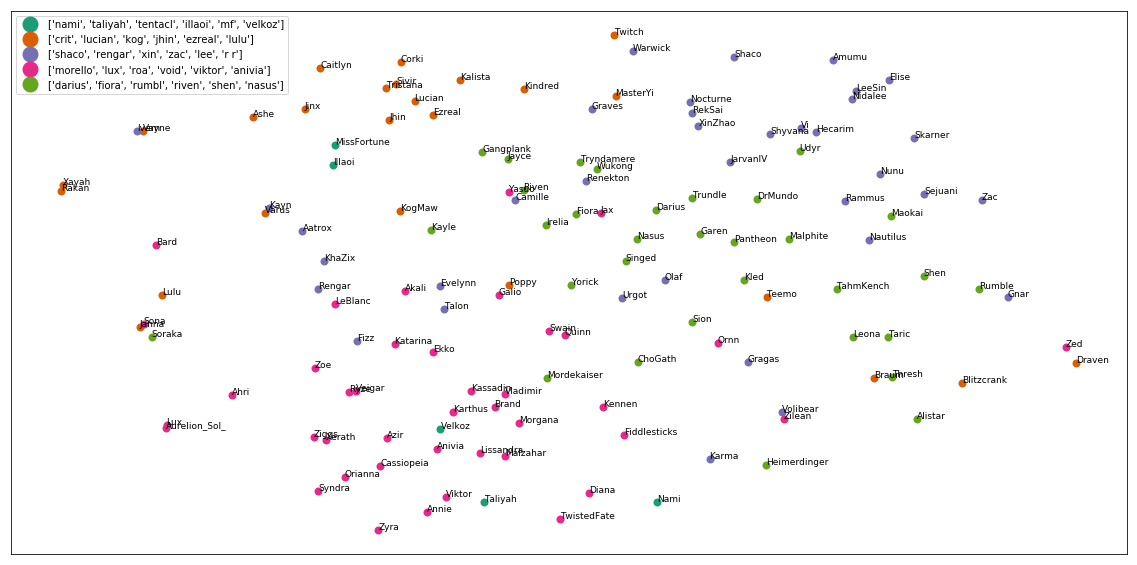

In [219]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=champ_order_list)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(20, 10)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1, markerscale=2)  #show legend with only 1 point

# add label in x,y position with the label as the champ name
for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=9)  

    
#uncomment the below to save the plot if need be
# plt.savefig('clusters_small_run2'+'perplexity'+str(perp)+'_'+'n_iter'+str(n_iter)+'.png', dpi=200)

plt.show() #show the plot

# Idea:
To see if this is really a good predictor of what champion one might like based on ones they have played, scrape mastery data from many players and compare the mastery scores of nearby champions.

How exactly to do this I am not yet sure.  We want a reward function that gives higher reward when a player has many mastery points in two champions that are close together.  

In [220]:
dist.shape

(139, 139)

# Some EDA on the champions DataFrame

In [221]:
all_champs_df = pd.read_csv('all_champs_df.csv')
all_champs_df.head()

,Unnamed: 0,Champion,Unnamed: 0.1,author,comments,post_id,post_url,score,title,type,upvote_ratio
0,0,Aatrox,0.0,AHare115,[{Redditor(name='YandereYasuo'): 'Tip: run bac...,76n1km,https://i.redd.it/w384udgxb3sz.jpg,96,Buff Bloodwell duration pls,reddit_media,1.00
1,1,Aatrox,1.0,Rastabrotha,[{Redditor(name='Baker_of_Faker'): 'KAWAII UwU...,7hrq7x,https://i.redd.it/s289i5mte5201.jpg,56,Reworked Aatrox splash leaked!!!,unknown,0.94
2,2,Aatrox,2.0,Monjus,[{Redditor(name='matux555'): 'Jesus christ wha...,7b6yf9,https://www.youtube.com/watch?v=cp0pnHs-5hw,56,Aatrox rework leaked ?,reddit_media,0.97
3,3,Aatrox,3.0,drakon136,[{Redditor(name='meyoko'): 'proud to say i saw...,7kpoy2,https://i.imgur.com/blVzWk1.png,51,You're damn right he does,unknown,1.00
4,4,Aatrox,4.0,Puncsaus,"[{Redditor(name='kameldinho'): ""AP Aatrox ones...",6bj8lf,https://i.redd.it/dw8xf4rhmwxy.jpg,45,Aatrox Core Items,youtube.com,1.00


In [222]:
frame.head()

,Champion,subreddit_content,cluster,num_comments
2,Aatrox,Tip: run back to the tower Easy fix for Riot i...,2,651
3,Ahri,Her clothes literally dont fit hahahahaha Well...,3,968
3,Akali,Im actually planning to draw something for Aka...,3,1072
2,Amumu,Im sure the enemy team was quite sad after tha...,2,190
3,Anivia,and please make mexico pay my mana costs We ne...,3,1026


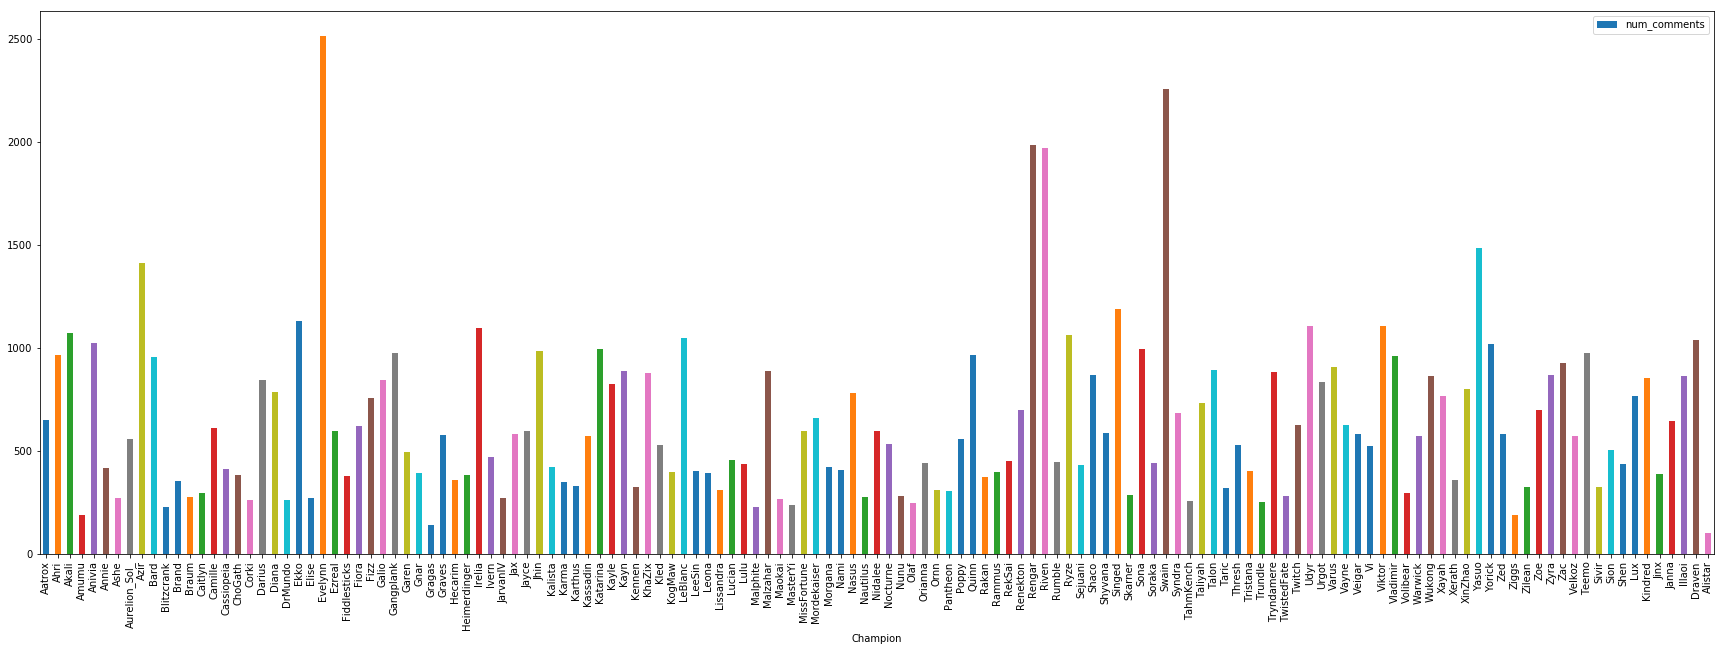

In [233]:
frame.plot(x='Champion', y='num_comments', kind='bar', figsize=(30,10))
plt.savefig('comments_per_subreddit.png', dpi=200)

In [257]:
# Order champs by releaste date, see if any trend in activity 
release_date_df = pd.read_csv('release_date.csv', encoding = "ISO-8859-1")
release_date_df.head()

,Champion,Release Date
0,Aatrox the Darkin Blade,6/13/2013
1,Ahri the Nine-Tailed Fox,12/14/2011
2,Akali the Fist of Shadow,5/11/2010
3,Alistar the Minotaur,2/21/2009
4,Amumu the Sad Mummy,6/26/2009


In [258]:
# Now lets get only the Champion name from the champion col 
release_date_df['Champion'] = release_date_df['Champion'].apply(lambda x: x.split()[0])
release_date_df.head()

,Champion,Release Date
0,Aatrox,6/13/2013
1,Ahri,12/14/2011
2,Akali,5/11/2010
3,Alistar,2/21/2009
4,Amumu,6/26/2009


In [263]:
champ_df2 = frame.copy()
champ_df_with_rd = pd.merge(champ_df2, release_date_df, on='Champion')
# champ_df_with_rd.shape, champ_df2.shape # 3 champions causing problems...lets find them 
champ_df_with_rd.head()

,Champion,subreddit_content,cluster,num_comments,Release Date
0,Aatrox,Tip: run back to the tower Easy fix for Riot i...,2,651,6/13/2013
1,Ahri,Her clothes literally dont fit hahahahaha Well...,3,968,12/14/2011
2,Akali,Im actually planning to draw something for Aka...,3,1072,5/11/2010
3,Amumu,Im sure the enemy team was quite sad after tha...,2,190,6/26/2009
4,Anivia,and please make mexico pay my mana costs We ne...,3,1026,7/10/2009


In [280]:
# Create timestamp values for the dates - to be used for sorting 
import time
import datetime
# s = "6/15/2013"
# time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple())

champ_df_with_rd['Release_ts'] = champ_df_with_rd['Release Date'].apply(lambda x: time.mktime(datetime.datetime.strptime(x, "%m/%d/%Y").timetuple()))
champ_df_with_rd.head()

,Champion,subreddit_content,cluster,num_comments,Release Date,Release_ts
0,Aatrox,Tip: run back to the tower Easy fix for Riot i...,2,651,6/13/2013,1.371100e+09
1,Ahri,Her clothes literally dont fit hahahahaha Well...,3,968,12/14/2011,1.323842e+09
2,Akali,Im actually planning to draw something for Aka...,3,1072,5/11/2010,1.273554e+09
3,Amumu,Im sure the enemy team was quite sad after tha...,2,190,6/26/2009,1.245992e+09
4,Anivia,and please make mexico pay my mana costs We ne...,3,1026,7/10/2009,1.247202e+09


In [296]:
# Sort by release date and graph like before 
champ_df_with_rd_sorted = champ_df_with_rd.sort_values(by='Release_ts')
champ_df_with_rd_sorted['Champ_and_date'] = champ_df_with_rd_sorted['Champion'] + '-' + champ_df_with_rd_sorted['Release Date']
champ_df_with_rd_sorted.head()

,Champion,subreddit_content,cluster,num_comments,Release Date,Release_ts,Champ_and_date
138,Alistar,which skin is this moo Rural Alistar obtainabl...,4,104,2/21/2009,1.235196e+09,Alistar-2/21/2009
100,Tristana,8 years and just want 1 good buff u.u Kaboom T...,1,404,2/21/2009,1.235196e+09,Tristana-2/21/2009
103,TwistedFate,That crazy wtf Didnt know they did that Grats ...,3,280,2/21/2009,1.235196e+09,TwistedFate-2/21/2009
25,Fiddlesticks,Pretty sure Riot actually never asked a fiddle...,3,381,2/21/2009,1.235196e+09,Fiddlesticks-2/21/2009
85,Ryze,EEQ QEQWQEQ MASTERACE Quarity shitpost Approve...,3,1063,2/21/2009,1.235196e+09,Ryze-2/21/2009


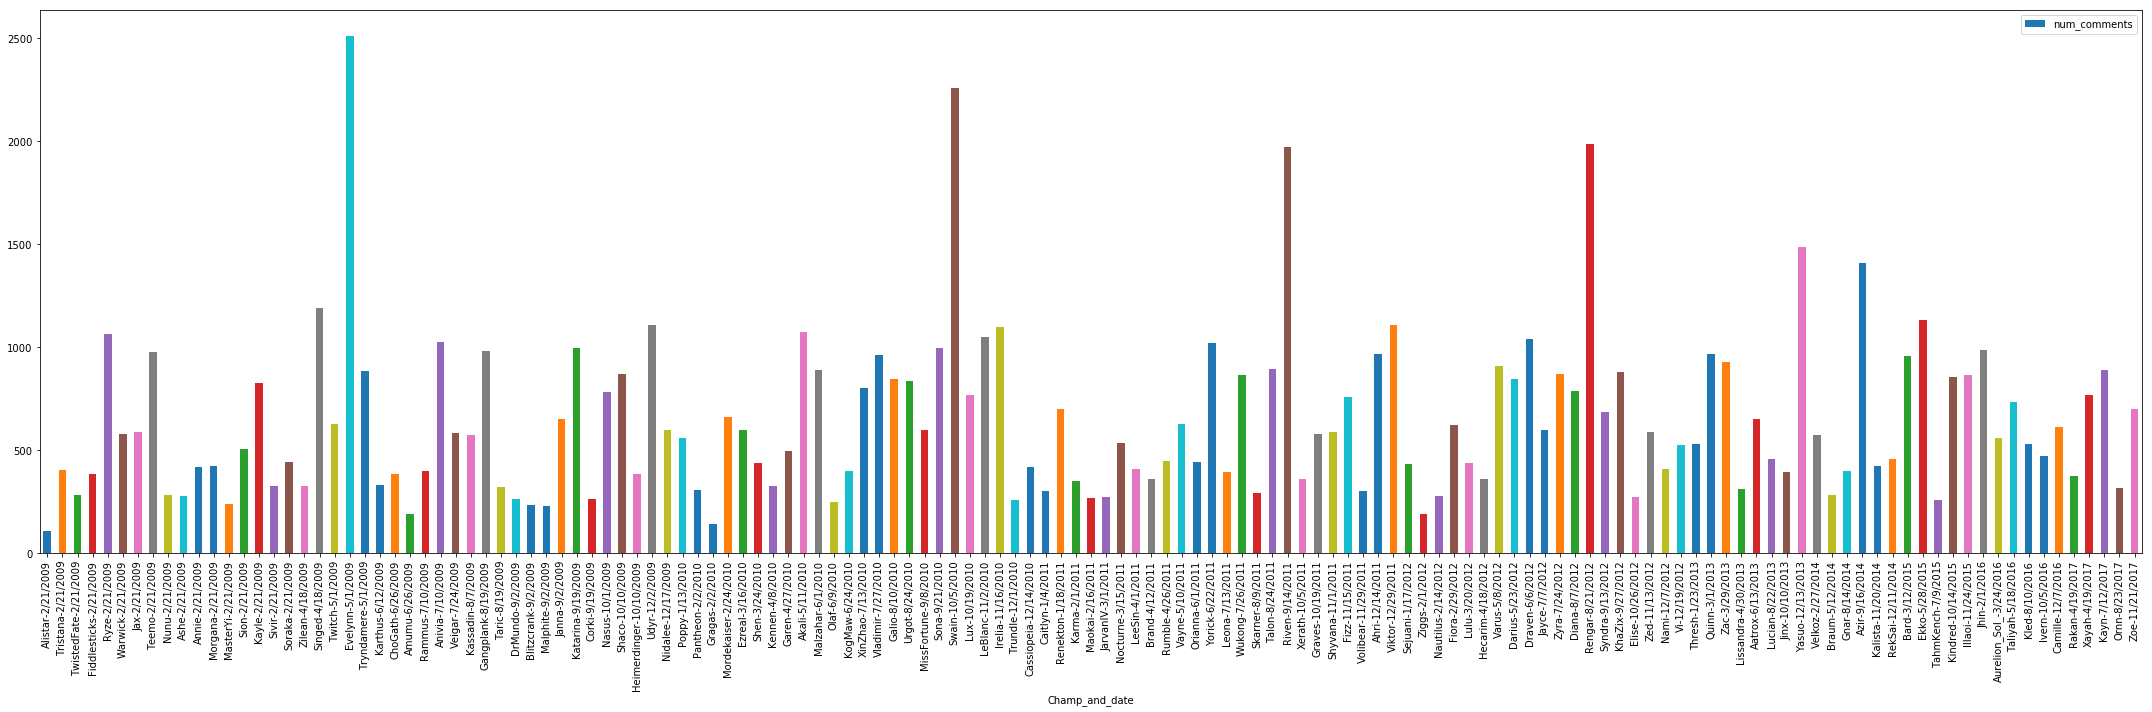

In [299]:
# rd_plot = champ_df_with_rd_sorted[['Release Date', 'num_comments']]
ax =champ_df_with_rd_sorted.plot(x='Champ_and_date', y='num_comments', kind='bar', figsize=(30,10))
# ax.set_xlabel(list(champ_df_with_rd_sorted['Champion']))

plt.tight_layout()
plt.savefig('comments_per_subreddit_sortedby_rd.png', dpi=200)



In [320]:
x = ['1/1/2009', '1/1/2010', '1/1/2011', '1/1/2012', '1/1/2013', '1/1/2014', '1/1/2015', '1/1/2016', '1/1/2017']
ts_list = []
for date in x:
    x_ts = time.mktime(datetime.datetime.strptime(date, "%m/%d/%Y").timetuple())
    ts_list.append(x_ts)
ts_list

[1230789600.0,
 1262325600.0,
 1293861600.0,
 1325397600.0,
 1357020000.0,
 1388556000.0,
 1420092000.0,
 1451628000.0,
 1483250400.0]

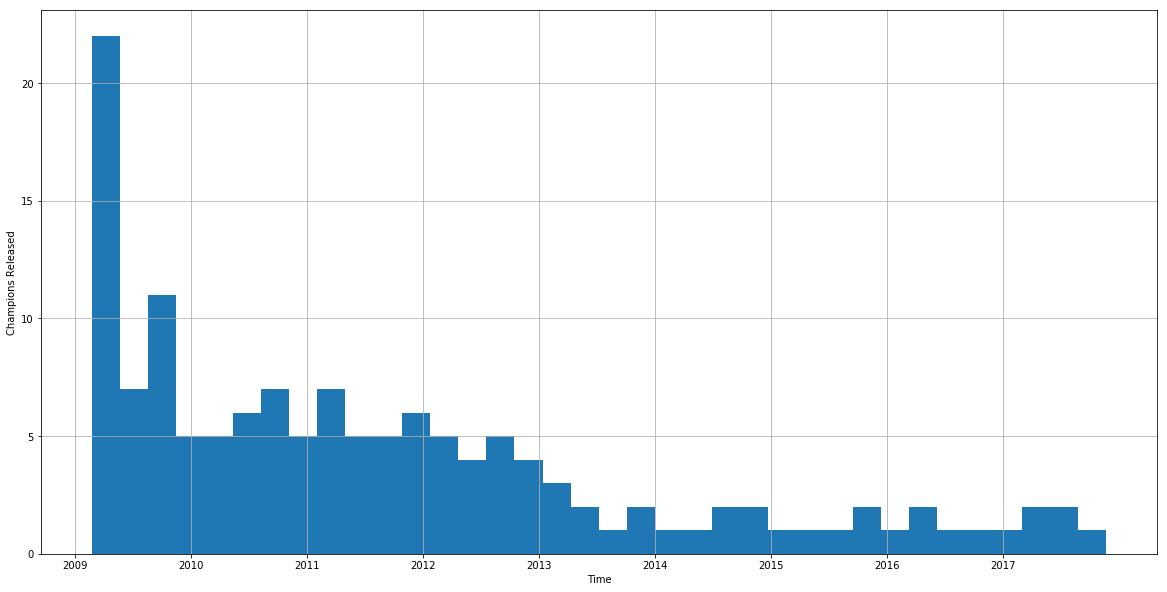

In [331]:
plt.xticks(ts_list, ['2009', '2010','2011','2012', '2013', '2014', '2015', '2016', '2017'])
plt.xlabel('Time')
plt.ylabel('Champions Released')
champ_df_with_rd_sorted['Release_ts'].hist(bins=36, figsize=(20,10))
plt.savefig('champ_release_freq_quarterly.png', dpi=200)

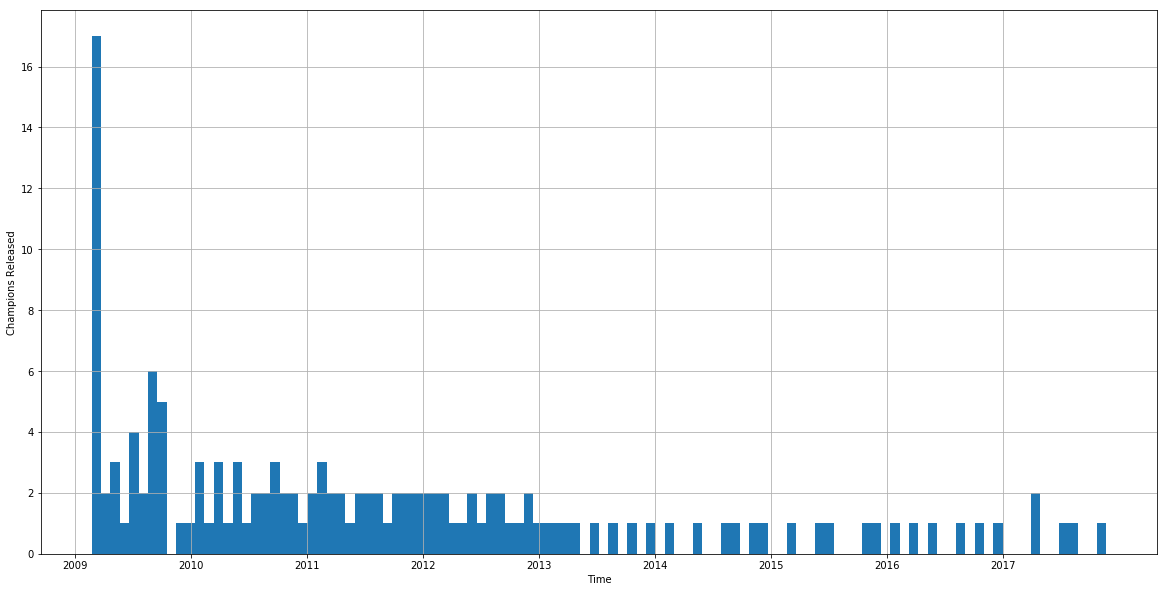

In [329]:
plt.xticks(ts_list, ['2009', '2010','2011','2012', '2013', '2014', '2015', '2016', '2017'])
plt.xlabel('Time')
plt.ylabel('Champions Released')
champ_df_with_rd_sorted['Release_ts'].hist(bins=108, figsize=(20,10))
plt.savefig('champ_release_freq_monthly.png', dpi=200)

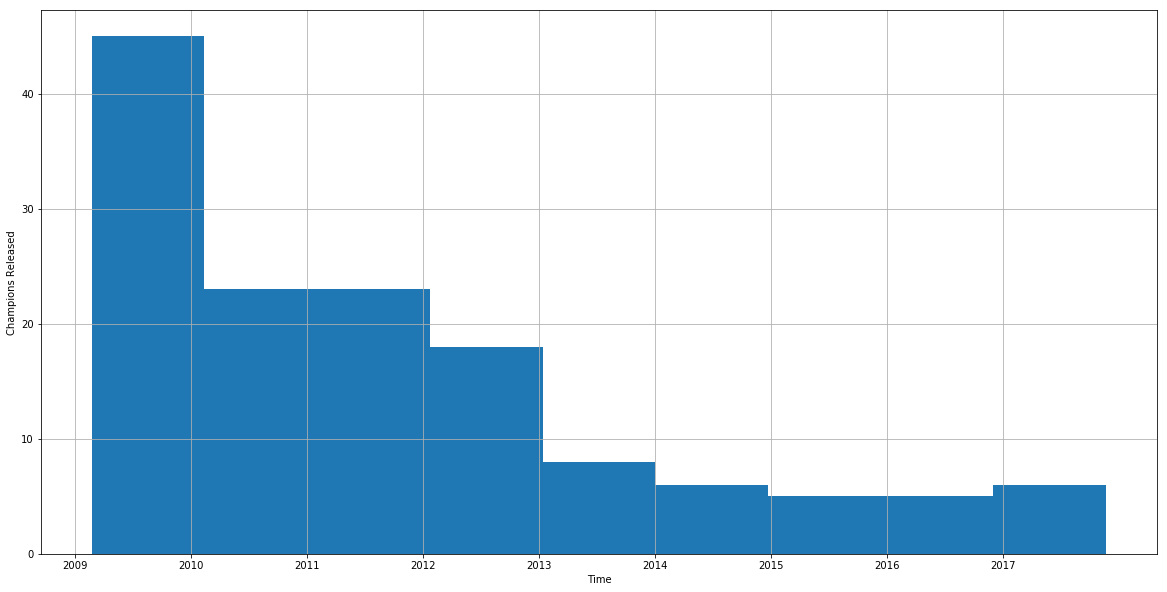

In [332]:
plt.xticks(ts_list, ['2009', '2010','2011','2012', '2013', '2014', '2015', '2016', '2017'])
plt.xlabel('Time')
plt.ylabel('Champions Released')
champ_df_with_rd_sorted['Release_ts'].hist(bins=9, figsize=(20,10))
plt.savefig('champ_release_freq_yearly.png', dpi=200)